## Importing Libraries

In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns


## Loading CSV

In [83]:
audit = pd.read_csv('C:/Users/Satyam/Desktop/UTD_2ndSem/Applied Machine Learning/audit_risk.csv')
trail = pd.read_csv('C:/Users/Satyam/Desktop/UTD_2ndSem/Applied Machine Learning/trial.csv')

## Merging two CSVs

In [84]:
merged = audit.merge(trail, on=['Sector_score','LOCATION_ID','PARA_A', 'PARA_B','TOTAL', 'numbers','Money_Value','History','Score','Risk'], how= 'inner')

In [85]:
merged.replace(['SAFIDON', 'LOHARU', 'NUH'], [45,46,47],inplace=True)

In [86]:
merged.LOCATION_ID = pd.to_numeric(merged.LOCATION_ID)

In [87]:
merged = merged.dropna()

In [88]:
merged.shape

(628, 35)

In [89]:
X = merged.loc[:, merged.columns != 'Audit_Risk']
y = merged.Audit_Risk

# Feature Selection


In [90]:
model = LinearRegression()
rfe = RFE(model, 31)
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True]
[2 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1]


In [91]:
nof_list=np.arange(1,34)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 31
Score with 31 features: 0.592990


In [95]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 31)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Risk', 'SCORE_A',
       'SCORE_B', 'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE',
       'History_score'],
      dtype='object')


## Dropping the least Important features

In [38]:
X = X.drop(['Sector_score','Score_MV', 'Detection_Risk'],axis=1)

In [39]:
X.shape

(628, 31)

## Test Train Split

In [40]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

## Using MinMaxScaler to scale the data

In [41]:
scaler = MinMaxScaler()

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 31 columns):
LOCATION_ID      628 non-null int64
PARA_A           628 non-null float64
Score_A          628 non-null float64
Risk_A           628 non-null float64
PARA_B           628 non-null float64
Score_B          628 non-null float64
Risk_B           628 non-null float64
TOTAL            628 non-null float64
numbers          628 non-null float64
Score_B.1        628 non-null float64
Risk_C           628 non-null float64
Money_Value      628 non-null float64
Risk_D           628 non-null float64
District_Loss    628 non-null int64
PROB             628 non-null float64
RiSk_E           628 non-null float64
History          628 non-null int64
Prob             628 non-null float64
Risk_F           628 non-null float64
Score            628 non-null float64
Inherent_Risk    628 non-null float64
CONTROL_RISK     628 non-null float64
Risk             628 non-null int64
SCORE_A          628 non-null

In [43]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

c:\users\satyam\favorites\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## KNN

In [60]:
knn = KNeighborsRegressor()
k_range = list(range(1,11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5)

In [61]:
grid.fit(X_train,y_train)

c:\users\satyam\favorites\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.41


Text(0, 0.5, 'MSE')

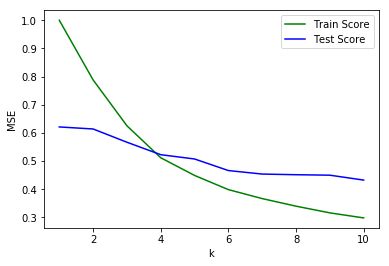

In [45]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,11):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,11)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [66]:
knn = KNeighborsRegressor(7)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.3666
Test score: 0.4537


In [67]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.50905775 0.54351776 0.60467747 0.07379919 0.32324017]
Average cross-validation score: 0.41


In [68]:
scores = cross_val_score(knn, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.54556856 0.46964784 0.64221203 0.15688574 0.3412289 ]
Average cross-validation score: 0.43


## Linear Regression

In [20]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.9615837836184778
0.5847814394936252


In [54]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

0.760589110034914
[-3.75695857e+00  6.55889741e+02  3.60880508e-01 -5.62078142e+01
  1.22839907e+04 -8.47799297e+00 -2.51549471e+03 -8.73434886e+03
 -9.99469132e+01 -1.20745549e+01  8.65105689e+01  2.11640029e+02
  1.54279906e+01  5.69310738e+00  1.09840978e+02 -5.32796227e+01
 -3.05643291e+02  1.73810103e+01  1.54664441e+02  9.93903092e+00
 -1.92865780e+02  1.34931248e+02 -4.45790943e+00  3.60880510e-01
 -8.47799297e+00 -1.20745549e+01 -4.18063984e+00  5.69310738e+00
 -2.09140645e+02  1.09840978e+02  1.73810103e+01]


In [56]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

17.274220887618284


In [57]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.1454858  0.20692943 0.33000506 0.43260958 0.68754189]
Average cross-validation score: 0.36


In [58]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
scores = cross_val_score(lreg, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.6116036   0.63299713 -0.31329326  0.51696673  0.5675371 ]
Average cross-validation score: 0.16


## Ridge Regression

In [59]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
         
grid = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

In [60]:
grid.fit(X_train, y_train)

c:\users\satyam\favorites\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.43


In [69]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

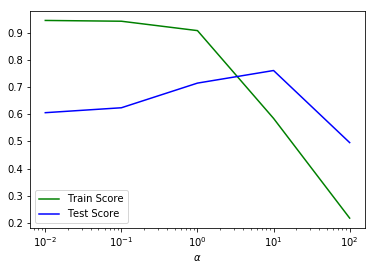

In [70]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

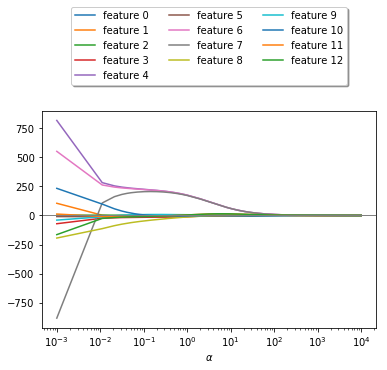

In [76]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [71]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9071
Test score: 0.7141


In [72]:
ridge = Ridge(alpha=1)
scores = cross_val_score(ridge, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.43929166 0.44563447 0.38723036 0.20073576 0.65254948]
Average cross-validation score: 0.43


In [64]:
scores = cross_val_score(ridge, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.35075673 0.75922524 0.80063685 0.44053804 0.01768587]
Average cross-validation score: 0.47


## LASSO

In [65]:
lasso = Lasso(random_state=0)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)

In [66]:
grid.fit(X_train, y_train)

c:\users\satyam\favorites\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [67]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.52


In [73]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

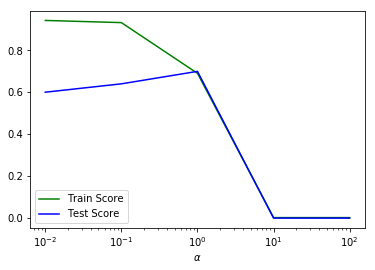

In [74]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


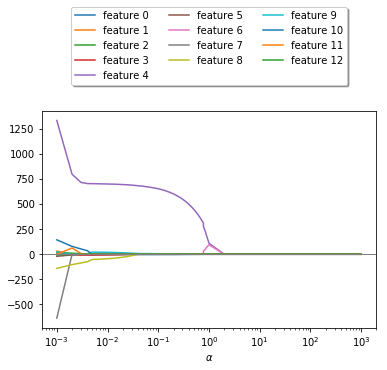

In [75]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [69]:
lasso = Lasso(alpha=1)
scores = cross_val_score(lasso, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.79225673 0.64575108 0.55877902 0.03397703 0.57343559]
Average cross-validation score: 0.52


In [70]:
scores = cross_val_score(lasso, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.5550581   0.70694474  0.7255028   0.23421922 -0.44764346]
Average cross-validation score: 0.35


## Polynomial Regression

In [17]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')


In [18]:
poly_grid.fit(X_train, y_train)

c:\users\satyam\favorites\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [19]:
print("Best parameters: {}".format(poly_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid.best_score_))

Best parameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
Best cross-validation score: -18.23


In [28]:
poly = PolynomialRegression(2)
scores = cross_val_score(poly, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.97678372 0.99999229 0.99969942 0.99837012 0.99010945 0.7560248
 0.97819575 0.99512053 0.72772584 0.85305865]
Average cross-validation score: 0.93


In [29]:
scores = cross_val_score(poly, X_test, y_test, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.97778792 0.92170446 0.94653829 0.9241581  0.91747459 0.89376389
 0.85764326 0.99283274 0.72604409 0.7627815 ]
Average cross-validation score: 0.89


## Support Vector with Kernel Trick

In [71]:
param_grid = {
    'kernel':['rbf','poly'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.01,0.1,1,10]
}
ksvr=SVR()
grid = GridSearchCV(ksvr, param_grid, cv=5,return_train_score=True)

In [72]:
grid.fit(X_train, y_train)

c:\users\satyam\favorites\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 100, 'gamma': 10, 'kernel': 'poly'}
Best cross-validation score: 0.95


In [74]:
svr = SVR(C=100, gamma=10, kernel= 'poly')
scores = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.97912542 0.96460905 0.88105193 0.92897744 0.9765764 ]
Average cross-validation score: 0.95


In [75]:
scores = cross_val_score(svr, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.91142639 0.97335251 0.97341396 0.86831921 0.71758603]
Average cross-validation score: 0.89


## Support Vector Regressor

In [76]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svr=SVR() 

In [77]:
grid = GridSearchCV(svr, param_grid, cv=5,return_train_score=True)

In [78]:
grid.fit(X_train, y_train)

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.64


In [81]:
svr =SVR(C=100)
scores = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.89079783 0.85040383 0.73536078 0.16926627 0.54700747]
Average cross-validation score: 0.64


c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

In [82]:
scores = cross_val_score(svr, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.76840566 0.72203719 0.51495509 0.35910514 0.34276475]
Average cross-validation score: 0.54


c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

## SGD Regressor

In [96]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


-1.4311307527537348e+23
-6.402380259923426e+23


In [97]:
sgd_reg.coef_

array([-1.01326968e+10, -1.47908404e+09,  3.40360915e+10,  3.44212146e+09,
        1.51780046e+10, -6.55686481e+10,  4.11661977e+09, -3.45718518e+10,
       -5.18812081e+10, -5.72624079e+11, -3.04909975e+10,  7.92975851e+11,
        1.46416373e+11,  2.81391954e+08,  7.98030573e+10,  4.13475566e+09,
       -7.05916167e+09,  2.81145678e+10,  4.94976655e+09, -4.63000580e+08,
       -1.38983749e+10, -5.20173089e+10,  7.64228823e+10,  1.42161930e+10,
       -2.96480093e+11,  1.02871373e+10,  3.44212146e+10,  4.11661977e+10,
       -3.04909975e+11,  2.81391954e+09,  4.13475566e+09,  1.95680534e+11,
       -7.05916167e+10, -4.63000580e+09])

In [98]:
sgd_reg.intercept_

array([3.18989285e+12])

In [99]:
sgd_reg.n_iter_

100000